<p align="right"><i>Foundations of Quantitative Research Methods - 2021/22 academic session</i></p>

# Comparisons and Correlations

Welcome to the second part of the module *Foundations of Quantitative Research Methods*. We are going to focus on the core ways we can analyse and interpret quantitative data. We are going to use a real, large-scale social survey called the **British Social Attitudes Survey, 2019**. In particulare we're going to focus on a set of survey questions relating to poverty and welfare. 

### Aims

This lesson - **Comparisons and Correlations** - has two aims:
1. Demonstrate how to analyse categorical and numeric variables two or more at a time.
2. Cultivate your computational skills through the use of the statistical programming langauge *R*. For example, in this notebook there are a number of opportunities for you to amend or write R syntax (code).

### Lesson details

* **Level**: Introductory, for individuals with some knowledge of univariate data analysis techniques (e.g., measures of dispersion and central tendency).
* **Duration**: 45-60 minutes.
* **Pre-requisites**: None.
* **Programming language**: R.
* **Learning outcomes**:
	1. Understand how to use R for conducting data analysis.
	2. Understand how to select and apply common data analysis techniques for categorical and numeric variables.

## Guide to using this resource

This learning resource was built using <a href="https://jupyter.org/" target=_blank>Jupyter Notebook</a>, an open-source software application that allows you to mix code, results and narrative in a single document. As <a href="https://jupyter4edu.github.io/jupyter-edu-book/" target=_blank>Barba et al. (2019)</a> espouse:
> In a world where every subject matter can have a data-supported treatment, where computational devices are omnipresent and pervasive, the union of natural language and computation creates compelling communication and learning opportunities.

If you are familiar with Jupyter notebooks then skip ahead to the main content (*Analysing Data*). Otherwise, the following is a quick guide to navigating and interacting with the notebook.

### Interaction

**You only need to execute the code that is contained in sections which are marked by `In []`.**

To execute a cell, click or double-click the cell and press the `Run` button on the top toolbar (you can also use the keyboard shortcut `Shift + Enter`).

Try it for yourself:

In [ ]:
name <- readline(prompt="Enter name: ")
print(paste("Hi", name, ", enjoy learning more about R and exploring data!"))

Notebooks are sequential, meaning code should be executed in order (top to bottom). For example, the following code won't work:

In [ ]:
x * 5

As the error message suggests, there is no object (variable) called `x`, therefore we cannot do any calculations with it. 

Let's try a sequential approach:

In [ ]:
x <- 10 # create an object called 'x' and give it the value '10'

In [ ]:
x * 5 # multiply 'x' by 5

### Learn more

Jupyter notebooks provide rich, flexible features for conducting and documenting your data analysis workflow. To learn more about additional notebook features, we recommend working through some of the <a href="https://github.com/darribas/gds19/blob/master/content/labs/lab_00.ipynb" target=_blank>materials</a> provided by Dani Arribas-Bel at the University of Liverpool. 

### Learner input

Throughout the lessons there times when you need to do the following activities:
* **TASK:** A coding task for you to complete (e.g. analyse different variables).
* **QUESTION:** A question regarding your interpretation of some code or a technique (e.g. what is the piece of code doing?).
* **EXERCISE:** A data analysis challenge for you to complete.

## Making comparisons

In the [**Statistical Summaries** lesson](https://github.com/DiarmuidM/foundations-of-quantitative-research-methods/blob/main/lessons/socy08022-statistical-summaries-2022-03-16.ipynb), we learned how to produce statistical summaries of categorical and numeric variables. This is an important step in any quantitative data analysis as it provides a basic understanding of our key variables. However many of the more interesting social science research questions involve **making comparisons**:
* [Is there a difference in the earnings of men and women?](https://doi.org/10.1177%2F0095399716636928)
* [Are children living in the most deprived areas more likely to be obese than those living in the least deprived?](http://dx.doi.org/10.1136/archdischild-2014-307036)
* [Does ethnicity affect trust in the police?](https://doi.org/10.1177%2F1098611104271105) 

Thus in this lesson we will focus on making comparisons using two variables of interest. In particular we will compare the following types of variables:
* **Categorical vs Categorical**
* **Categorical vs Numeric**
* **Numeric vs Numeric**

The process of comparing two variables is known as **bivariate data analysis**.

Although the specific bivariate analysis techniques differ depending on which types of variables we are comparing, there is a common process:
1. Produce a table or graph of the joint distribution of the two variables.
2. Calculate a statistic that summarises key features of the joint distribution.
3. Make a statement about whether the pattern you observe likely to generalise or not (that is, does the pattern only exist in your sample? Or are you likely to find it also in the population from which your sample came?).

We will focus on the first two steps in the process in this lesson. In Week 12 we will address the third step.

### Terminology

Let's refresh our memory of key terms when conducting quantitative data analysis:
* **Case** - the entity we are analysing e.g., people, countries, companies, animals, events.
* **Variable** - a characteristic that can vary in value among cases in a sample or population. Usually represented as a column in a dataset.
* **Observation** - a set of measurements of the variables for a case. Usually represented as a row in a dataset.
* **Respondent** - the case who responds to the survey - for obvious reasons, almost always a person.
* **Dependent variable (Y)** - the characteristic we are trying to describe / explain.
* **Independent variable (X)** - the characteristic we think helps describe or explain the dependent variable.

The designation of one variable as the dependent and the other as the independent is your decision and does not affect the type of bivariate analysis you need. It simply provides a better link with a theory you think explains the relationship you observe.

### Correlation

The purpose of making comparisons is to reveal whether there is a correlation (association) between two variables. What do we mean by correlation? Simply that there is a relationship between two variables (Fogarty, 2019). For example, as the value of one variable increases, do we also observe a similar increase in a second variable?

The relationship may be non-existent, weak, moderate or strong. It may be positive (both variables increase/decrease in value) or negative (e.g., one increases and the other decreases). Or if we are dealing with categorical variables, are you more likely to be in a category of the dependent variable based on being a member of a category of the independent variable (e.g., are you more likely to vote SNP if you are married)?

**Caveat**: it is important to remember that even though two variables may be associated, it does not mean there is a causal link between them. As is oft-stated: correlation does not equal causation.

![xkcd comic](https://imgs.xkcd.com/comics/correlation.png)

## Doing data analysis

In this lesson we focus on analysing *two* variables at a time. In particular, we will examine whether:
1. A respondent's sex is correlated with their attitude to income inequality in Britain (*Categorical vs Categorical* comparison).
2. A respondent's age is correlated with their estimate of how many welfare claimants are engaging in fraud (*Categorical vs Numeric* comparison).
3. A respondent's attitude to welfare is correlated with their estimate of how many welfare claimants are engaging in fraud (*Numeric vs Numeric* comparison).

### Importing data

The first step is to import the *British Social Attidues* data for analysis.

In [1]:
bsa2019 <- read.table("./data/bsa2019_poverty_open.tab", header=TRUE, na="NA", sep="\t")
head(bsa2019) # view the first six observations

,Sserial,WtFactor,RSex,RAgeCat,eq_inc_quintiles,RClassGp,HEdQual3,Married,ChildHh,skipmeal,...,Dole,TaxSpend,MuchPov,Poverty1,Poverty2,NatFrEst,incdiffs,welfare2,leftrigh,libauth
,<int>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
1,310001,0.9119594,2,6,-1,1,2,1,2,-1,...,3,3,8,2,1,5,-1,2.500,2.4,3.500000
2,310002,0.4439626,2,3,5,1,2,2,2,1,...,2,3,2,2,2,30,2,3.125,2.0,3.833333
3,310003,1.2182741,2,4,-1,1,3,1,1,-1,...,2,2,2,2,2,50,-1,3.125,2.2,4.166667
4,310004,1.5839969,1,2,4,1,2,4,2,-1,...,3,3,2,2,1,50,-1,2.250,3.2,2.166667
5,310005,0.4743091,1,6,-1,5,4,4,2,1,...,2,3,1,2,1,50,4,3.375,1.6,4.666667
6,310006,1.1363125,1,4,1,3,8,1,1,-1,...,2,2,1,1,1,10,-1,2.875,1.8,3.666667


In [2]:
names(bsa2019)

[1] "Sserial"          "WtFactor"         "RSex"             "RAgeCat"         
 [5] "eq_inc_quintiles" "RClassGp"         "HEdQual3"         "Married"         
 [9] "ChildHh"          "skipmeal"         "paptype"          "SMNews"          
[13] "PartyId2"         "Politics"         "SocTrust"         "Spend1"          
[17] "Dole"             "TaxSpend"         "MuchPov"          "Poverty1"        
[21] "Poverty2"         "NatFrEst"         "incdiffs"         "welfare2"        
[25] "leftrigh"         "libauth"

### Categorical vs Categorical

The two variables we need for our comparison are:
* `RSex` is a binary measure of a respondent's sex. There are two categories: Male and Female. It is a type of nominal variable.
*  `incdiffs` is a measure of how strongly respondent's agree or disagree about the level of income inequality in Britain: *Differences in income in GB are too large?* The responses are a set of categories ranging from "Strongly agree" to "Strongly disagree", therefore this is a categorical variable, specifically an ordinal variable.

#### Labelling values

Revisit the first lesson if you want to understand why it is important to label the values of our categorical variables. For now we will just perform this task quickly.

In [3]:
bsa2019$incdiffs <- factor(bsa2019$incdiffs, levels = c(1,2,3,4,5), labels = c("Strongly agree", "Agree", 
                                                                               "Neither agree nor disagree", "Disagree", "Strongly disagree"))

In [4]:
bsa2019$RSex <- factor(bsa2019$RSex, levels = c(1,2), labels = c("Male", "Female"))

In [34]:
bsa2019$RAgeCat <- factor(bsa2019$RAgeCat, levels = c(1,2,3,4,5,6,7), labels = c("18-24", "25-34", "35-44", "45-54", 
                                                                                "55-59", "60-64", "65+"))

#### Separate summaries

We begin by displaying separate frequency tables for each variable:

In [5]:
table(bsa2019$incdiffs)


            Strongly agree                      Agree 
                       621                        710 
Neither agree nor disagree                   Disagree 
                       244                         57 
         Strongly disagree 
                        18 

In [6]:
table(bsa2019$RSex)


  Male Female 
  1454   1770 

A slight majority of respondents are female, and the vast majority agree or strongly agree that income inequality is too large in Britain.

Now let's make things more interesting by asking: is there a correlation between somebody's sex and whether they think income inequality is too large. More precisely, we are designating sex as the **independent variable** and attitude to income inequality as the **dependent variable**.

A little thinking should clarify why this designation makes sense: we can imagine ways in which a person's sex informs their political and social attitudes; it is impossible for a person's attitudes to determine / explain / cause their sex.

#### Joint distribution

We can make our comparison by producing a frequency table of the two variables simultaneously, known as a **crosstabulation** or **contingency table**:

In [12]:
crotab <- round(addmargins(prop.table(table(bsa2019$incdiffs, bsa2019$RSex), 2) * 100, 2, FUN = mean), 0) # build table
crotab # display table

,Male,Female,mean
Strongly agree,36,39,37
Agree,43,43,43
Neither agree nor disagree,15,15,15
Disagree,5,2,4
Strongly disagree,2,1,1


The table displays the percentage of males and females in each category of the income inequality variable. For each row in the table, we can compare the percentage of males and females. For example, a slightly higher percentage of females compared to males strongly agree that income inequality is too large in Britain. 

The *mean* column shows what percentage of respondents overall are in each category of the income inequality variable. That is, what percentage of males AND females strongly agree etc.

While we observe minor differences in some rows, the overall pattern is clear: there are few differences in the attitudes of males and females with respect to income inequality.

#### Measures of association

Our visual inspection of the joint distribution of the two variables - `RSex` and `incdiffs` - suggests that there is no correlation between them. That is, knowing a respondent's sex does not predict their attitude to income inequality.

However it would be nice to quantify the apparent lack of a correlation. We can do this by selecting an appropriate **measure of association**.

Recall that we have two categorical variables, specifically one nominal (`RSex`) and one ordinal (`incdiffs`). In this instance the most appropriate measure of association is called *Cramer's V*. This measure ranges between 0 (no correlation) and 1 (perfect correlation) and summarises the strength of the association between two varaibles.

Let's calculate it for our two variables of interest:

In [25]:
library(lsr) # import additional functions into R

In [26]:
round(cramersV(bsa2019$incdiffs, bsa2019$RSex), 2)

[1] 0.09

**QUESTION**: how would you describe the strength of the association between sex and attitude to income inequality?

### Categorical vs Numeric

How do we approach bivariate analysis when we have one categorical and one numeric variable? The key task is to summarise the numeric variable for different categories of our categorical variable. That is, we want to see if measures of central tendency (e.g., mean, median) and dispersion (e.g., standard deviation, minimum, maximum) vary across categories of a chosen variable.

#### Separate summaries

We are interested in whether a respondent's age (`RAgeCat`) is correlated with their estimate of how many welfare claimants are engaging in fraud (`NatFrEst`).

In [36]:
round(prop.table(ftable(bsa2019$RAgeCat)) * 100, 0)

 18-24 25-34 35-44 45-54 55-59 60-64 65+
                                        
     6    13    16    17     8     8  31

31% of respondents to the survey were 65 years or older.

In [37]:
bsa2019$NatFrEst[bsa2019$NatFrEst > 100] <- NA # set "998" and "999" as missing values

In [38]:
summary(bsa2019$NatFrEst)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0    10.0    30.0    35.8    50.0   100.0     246 

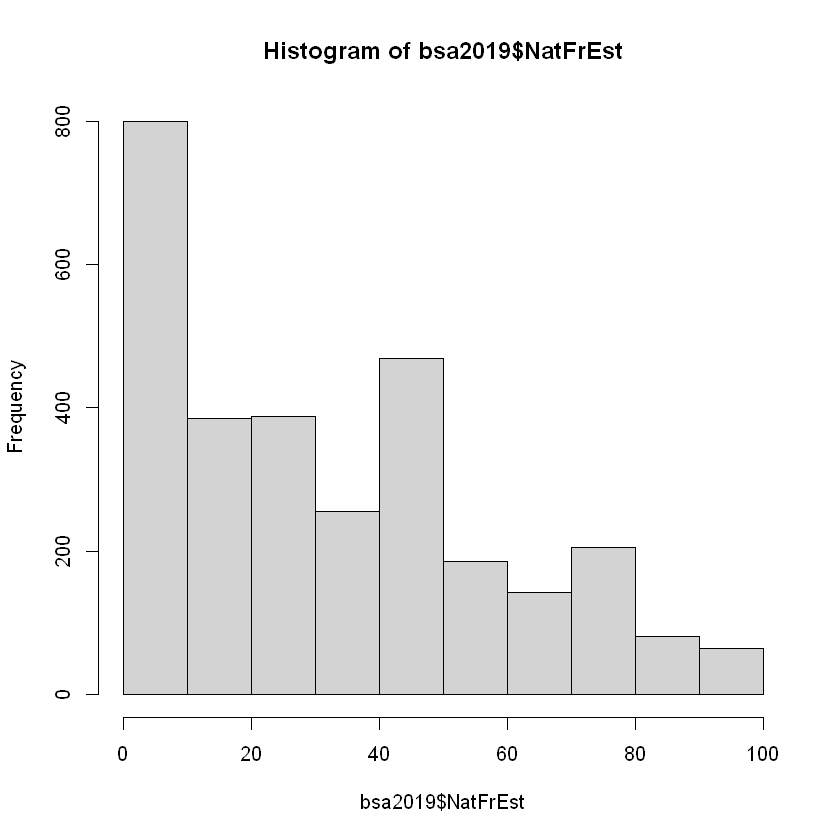

In [39]:
hist(bsa2019$NatFrEst, breaks = seq(0, 100, by=10))

#### Joint distribution

We can use a **table of means** to see how the average of a numeric variable varies across categories of a categorical variable. Actually, this approach can be generalised to include lots of other summaries of numeric variables (e.g., standard deviation, minimum, maximum). Let's see an example by comparing whether average estimate of welfare fraud varies across categories of age:

In [44]:
aggregate(NatFrEst ~ RAgeCat, data = bsa2019, mean)

RAgeCat,NatFrEst
<fct>,<dbl>
18-24,34.77660
25-34,35.72613
35-44,34.73200
45-54,34.02372
55-59,36.22128
60-64,34.56118
65+,37.84176


In [45]:
aggregate(NatFrEst ~ RAgeCat, data = bsa2019, median)

RAgeCat,NatFrEst
<fct>,<dbl>
18-24,30
25-34,30
35-44,30
45-54,30
55-59,30
60-64,30
65+,30


Using the mean and median as our summaries, we see that there isn't a clear age trend in estimates of welfare fraud.

**TASK:** Display summary tables of the minimum and maximum values of `NatFrEst`.

#### Measures of association

The appropriate measure of association when you have one categorical and one numeric variable is:
* *Eta squared*

This tells us the strength of the association but not the direction (we need to infer this from the summary tables above). *Eta squared* coefficient ranges from 0 to 1, with higher values representing stronger associations.

In [47]:
library(lsr) # import the package containing the `etaSquared()` command

In [48]:
model <- aov(NatFrEst ~ RAgeCat, data = bsa2019)
etaSquared(model)

,eta.sq,eta.sq.part
RAgeCat,0.00321291,0.00321291


The extremely low value for the *Eta squared* coefficient implies that there is a non-existent correlation between age and estimates of welfare fraud. This makes sense, as the variation in estimates across age groups is very small and really only noticeable when we compare the youngest and oldest age groups.

### Numeric vs Numeric

Finally, we consider correlations between two numeric variables.

#### Separate summaries

We are interested in whether a respondent's attitude to welfare (`welfare2`) is correlated with their estimate of how many welfare claimants are engaging in fraud (`NatFrEst`).

In [49]:
bsa2019$welfare2[bsa2019$welfare2 > 5 | bsa2019$welfare2 < 1] <- NA

In [50]:
summary(bsa2019$welfare2)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  1.000   2.308   2.750   2.731   3.125   5.000     642 

In [51]:
summary(bsa2019$NatFrEst)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0    10.0    30.0    35.8    50.0   100.0     246 

#### Joint distribution

It is difficult to use tables to examine the distributions of numeric variables: there are often too many values to display. For example, here is a frequency table of `NatFrEst`, showing how many times each value occurs:

In [53]:
ftable(bsa2019$NatFrEst)

   0   1   2   3   4   5   6   7   8   9  10  12  13  15  18  19  20  23  25  27  30  32  33  35  38  40  42  43  45  46  47  48  49  50  51  55  56  57  59  60  63  65  66  68  69  70  75  78  79  80  82  85  86  88  90  93  95  98  99 100
                                                                                                                                                                                                                                                
   8  68  82  43  25 192   3  14  10   1 354   7   1  90   1   1 286   1 190   3 194   2  19  45   1 188   1   3  23   2   1   2   1 436   2  20   1   2   1 160   1  29   2   2   2 107  77   2   1 126   2  18   1   2  58   1  10   4  19  30

And that's just one variable. A better way of displaying the joint distribution of two numeric variables is to use a **scatterplot**:

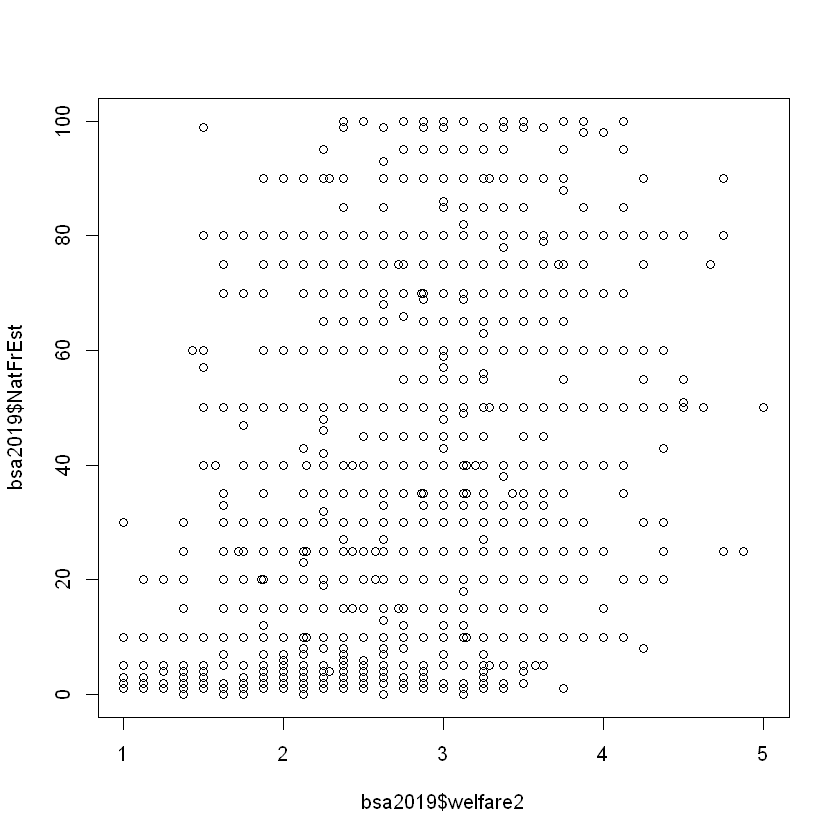

In [54]:
plot(bsa2019$welfare2, bsa2019$NatFrEst) # X variable (axis) is listed first, Y variable (axis) second

If I were to make a tentative interpretation, it would be that as somebody's attitude to welfare becomes more negative (that is, `welfare2` variable increases towards 5) their estimate of welfare fraud tends to be slightly higher. However it might be easier to interpret an appropriate measure of association.

#### Measure of association

We will use the following measure of association:
* *Pearson's correlation coefficient (r)*

Similar to other measures of association, it tells us the strength and direction of the association between two variables. The coefficient ranges between -1 and 1, with negative values representing negative associations, and positive values positive associations. Values closer to -1 or 1 indicate stronger associations than those closer to 0.

In [59]:
round(cor(bsa2019$welfare2, bsa2019$NatFrEst, use = "complete.obs"), 2)

[1] 0.4

Let's interpret the correlation coefficient:
* The number is reasonably far from 0, therefore there is a moderate-to-strong correlation between these two variables.
* The number is greater than 0, therefore there is a positive relationship between these two variables - as the value of one variable increases, the value of the other variable also tends to increase.

## Conclusion

In this lesson we encountered a range of techniques for summarising more than one variable at a time, in particular focusing on whether two variables are related.

In the next lesson we look at how we can produce statistics that help us make claims about the *generalisability* of our analyses.

## Solutions to tasks

### Display summary tables of the minimum and maximum values of `NatFrEst`.

In [61]:
aggregate(NatFrEst ~ RAgeCat, data = bsa2019, min)

RAgeCat,NatFrEst
<fct>,<int>
18-24,0
25-34,0
35-44,0
45-54,1
55-59,1
60-64,0
65+,1


In [62]:
aggregate(NatFrEst ~ RAgeCat, data = bsa2019, max)

RAgeCat,NatFrEst
<fct>,<int>
18-24,100
25-34,100
35-44,100
45-54,100
55-59,100
60-64,100
65+,100
